In [132]:
from IPython import display
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2 as cv2


def load_dataset(flatten=False):
    """
    Returns:
    images_train - training data     60000x784
    labels_train - training labels   60000x1
    images_test  - test data         10000x784
    labels_test  - test labels       10000x1

    The source data loaded via keras holds the images as 28x28 - the 'flatten' arg
    will convert this to 784x1.

    images_train is initially 60000x28x28, and images_test is 10000x28x28

    The images are 'flattened' to 784x1, and also the pixels are normalized from
    0..255 to 0..1
    """
    # Use keras library to load MNIST data from interweb
    (images_train, labels_train), (images_test, labels_test) = keras.datasets.mnist.load_data()
    print("Loaded training images", images_train.shape)
    print("Loaded test images", images_test.shape)

    # normalize input pixel values int 0..255 to float 0..1
    images_train = images_train.astype(float) / 255.
    images_test = images_test.astype(float) / 255.

    if flatten:
        images_train = images_train.reshape([images_train.shape[0], -1])
        images_test = images_test.reshape([images_test.shape[0], -1])

    return (images_train, labels_train), (images_test, labels_test)



def zero_one(y_train):
    y_new = np.zeros(y_train.shape)
    y_new[np.where(y_train == 0.0)[0]] = 1
    return y_new

# Print a 784 x 1 image to the console
def print_image(image):
    for i in range(28):
        for j in range(28):
            print( '  ' if image[i*28+j] > 0.5 else '00', end='')
        print()

# SIGMOID activation function
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

# LOSS function

def compute_loss(Y, Y_hat):

    m = Y.shape[1]
    L = -(1./m) * ( np.sum( np.multiply(np.log(Y_hat),Y) ) + np.sum( np.multiply(np.log(1-Y_hat),(1-Y)) ) )

    return L

def run_w():
    print("--------_TRAINING_------------")
    accuracyPlot = []
    costPlot =[]
    epochPlot = []
    
    learning_rate = 1

    (X_train, y_train),(X_test, y_test) = load_dataset()

    X = X_train.reshape([X_train.shape[0],-1]).T # 60000 x 28 x 28 -> 60000 x 784

    print("Input matrix X is",X.shape)

    n_x = X.shape[0]
    print("n_x is", n_x)
    m = X.shape[1]
    print("m is ", m)

    Y = zero_one(y_train).reshape(1,m)

    print("Truth matrix Y is", Y.shape)

    # Create 784x1 weight matrix initialised with small random numbers
    W = np.random.randn(n_x, 1) * 0.01
    print("Weight matrix W is ", W.shape)

    
    #Diplay for holding the plot
    
    
    # Bias is 1 x 1
    b = np.zeros((1, 1))
    
    for i in range(50):
        epochPlot.append(i)
        
        Z = np.matmul(W.T, X) + b
        Y_hat = sigmoid(Z)

        # Z1 = np.matmul(W1.T, Y_hat) + b1
        # Y_hat1 = sigmoid(Z1)

        cost = compute_loss(Y, Y_hat) 

        costPlot.append(cost)

        
        # Calculate partial differentials

        dW = (1/m) * np.matmul(X, (Y_hat-Y).T)
        db = (1/m) * np.sum(Y_hat-Y, axis=1, keepdims=True)

        # update weights
        W = W - learning_rate * dW
        b = b - learning_rate * db
        
        if (i % 1 == 0):
            print("Epoch", i, "cost: ", cost)
        
        no_zeros = 0
        failed_to_predict = 0
        print("-----")
        for i in range(m):
            target = Y[0][i]
            if target == 1:
                no_zeros += 1
                predicted = 1
                if Y_hat[0][i] < 0.5:
                    predicted = 0
                if predicted != target:
                    #print(f"Y_hat: {Y_hat[0][i]} failed to be 1")
                    failed_to_predict += 1
        accuracy = ((no_zeros - failed_to_predict )/no_zeros) * 100
        accuracyPlot.append(accuracy)
        
        print(f"number of zeros: {no_zeros}")
        print(f"number failed to classify: {failed_to_predict}")

        print(f"Zero Detection Accuracy: {accuracy}%")

        display.clear_output(wait=True)

        fig, (ax1, ax2) = plt.subplots(2)
        
        ax1.plot(epochPlot,costPlot)
        ax2.plot(epochPlot,accuracyPlot)
        
        display.display(plt.gcf())
    print("Final cost:", cost)
    return W,b


def test(W,b):
    print("--------_TESTING_------------")
    (X_train, y_train),(X_test, y_test) = load_dataset()
    X = X_test.reshape([X_test.shape[0],-1]).T # 60000 x 28 x 28 -> 60000 x 784
    Z = np.matmul(W.T, X) + b
    Y_hat = sigmoid(Z)
    Y = zero_one(y_test).reshape(1,-1)
    incorrect = 0
    no_zeros = 0
    incorrect_zero = 0
    for i in range(9999):
        output = Y_hat[0][i]
        target = Y[0][i]
        predicted = round(output)
        if target == 1:
            no_zeros += 1
        if predicted != target:
            if target == 1:
                incorrect_zero += 1
            #print_image(X[:,i])
            incorrect += 1
            
    correct = 10000-incorrect
    accuracy = correct/100
    zero_detection = (no_zeros - incorrect_zero )/no_zeros
    print(f"Total Incorrect: {incorrect}")
    print(f"Total Correct  : {correct}")
    print(f"Accuracy       : {accuracy}%")
    print(f"Accuracy of 0 detection: {zero_detection}%")
    return Y_hat

#Image is a number.
def testImage(W,b,imageNum):
    
    (X_train, y_train),(X_test, y_test) = load_dataset()
    X = X_test.reshape([X_test.shape[0],-1]).T # 784, 10000
    image = X[:,imageNum].reshape(-1,1)

    Z = np.matmul(W.T, image) + b
    Y_hat = sigmoid(Z)
    
    y = zero_one(y_test)[imageNum]
    print(Y_hat)
    print(y)

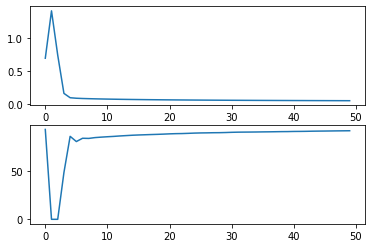

Final cost: 0.04888149727472586
--------_TESTING_------------
Loaded training images (60000, 28, 28)
Loaded test images (10000, 28, 28)
Total Incorrect: 104
Total Correct  : 9896
Accuracy       : 98.96%
Accuracy of 0 detection: 0.9459183673469388%
Loaded training images (60000, 28, 28)
Loaded test images (10000, 28, 28)
[[0.0228437]]
0.0


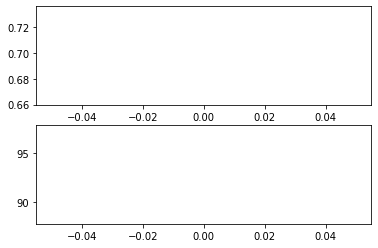

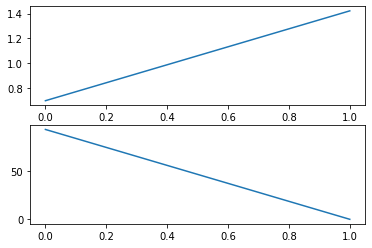

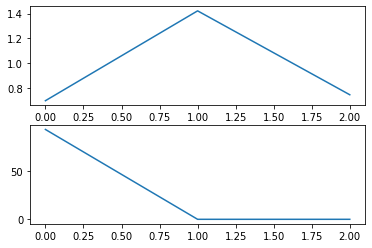

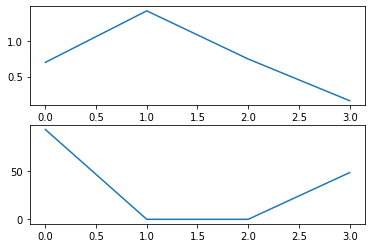

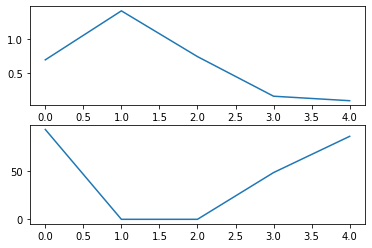

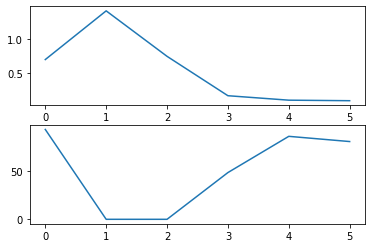

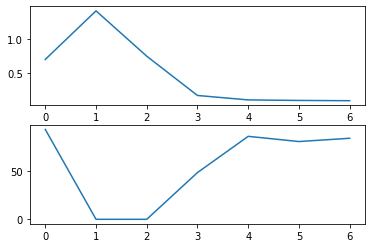

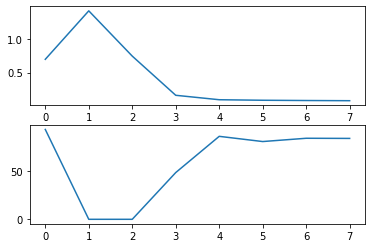

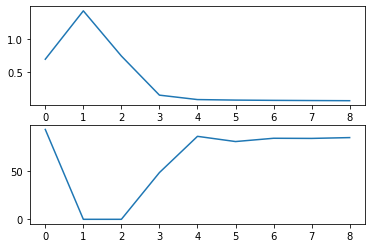

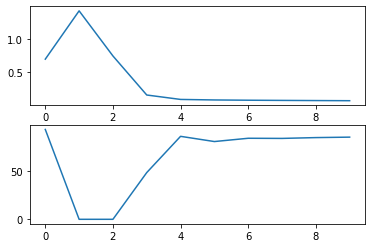

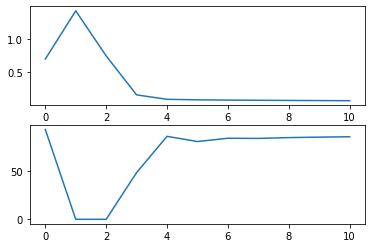

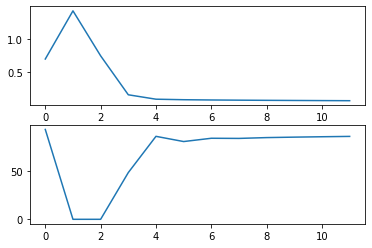

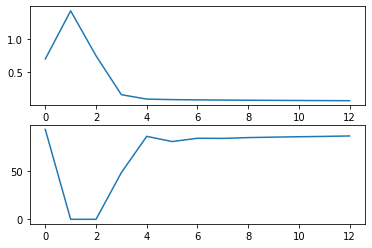

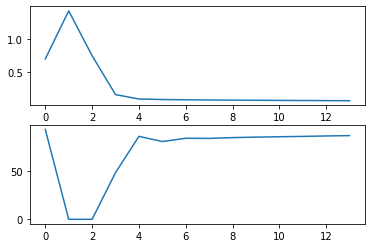

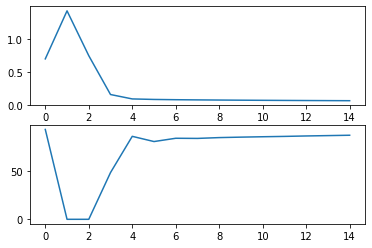

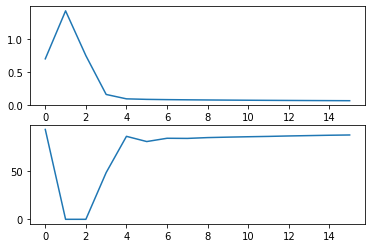

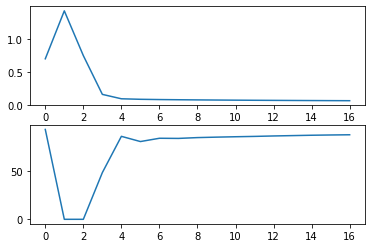

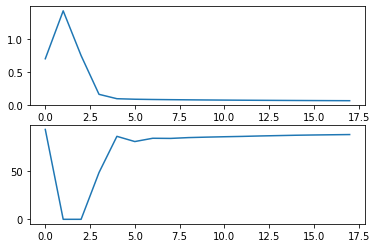

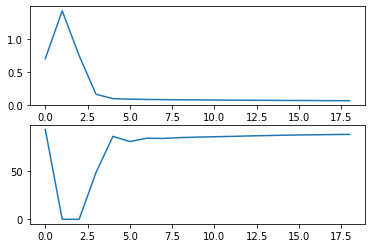

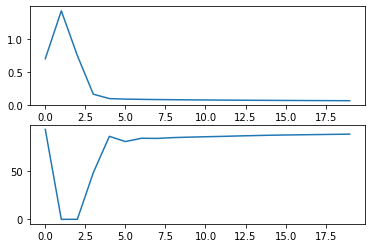

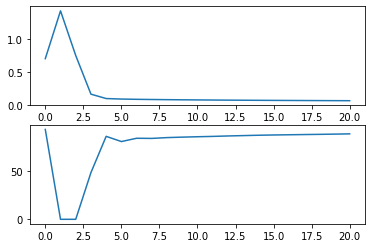

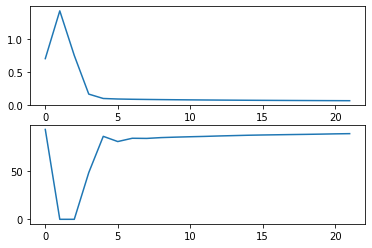

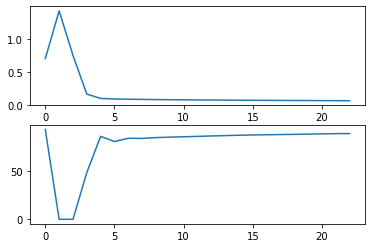

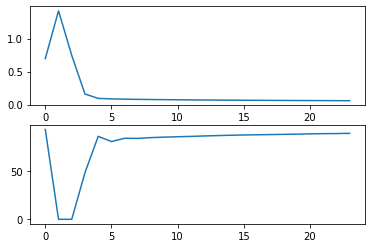

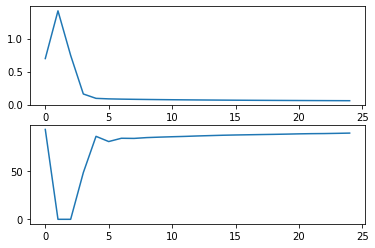

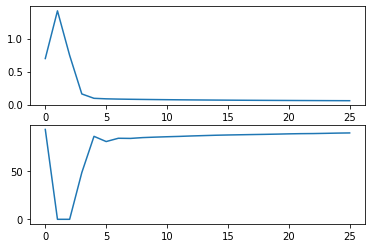

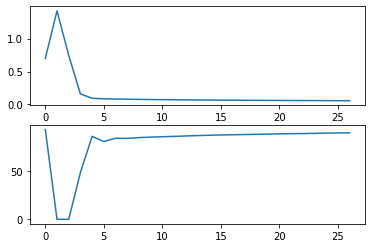

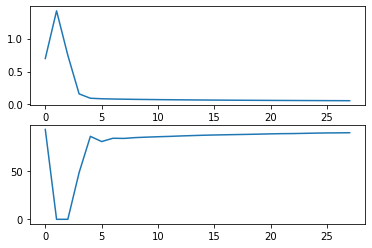

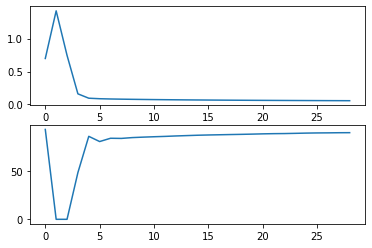

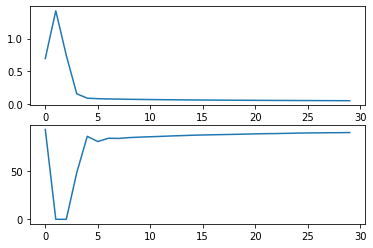

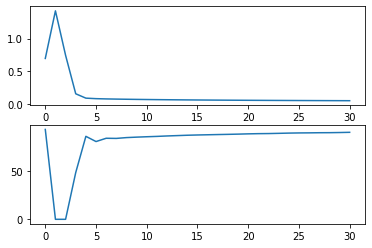

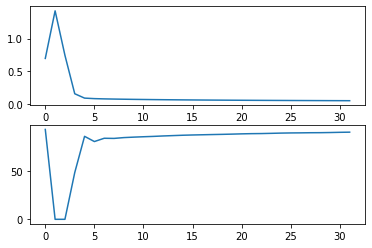

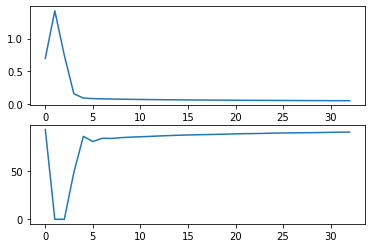

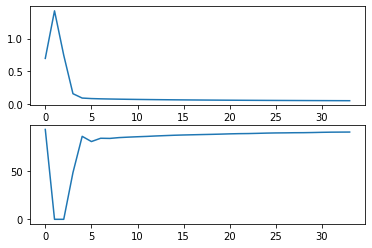

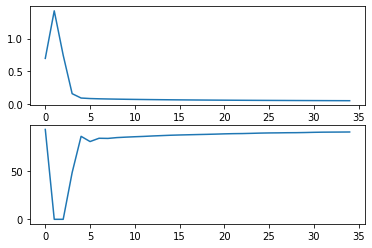

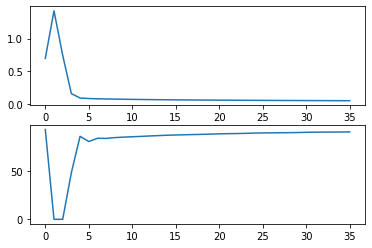

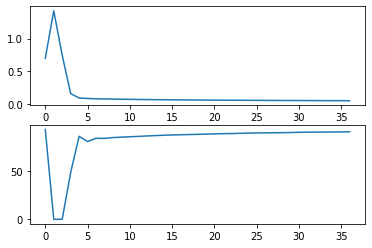

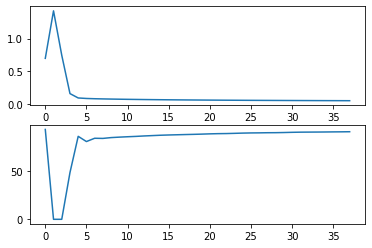

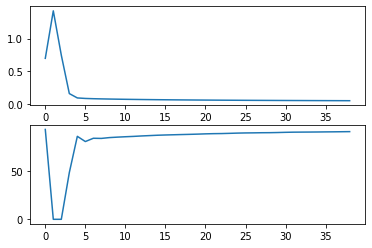

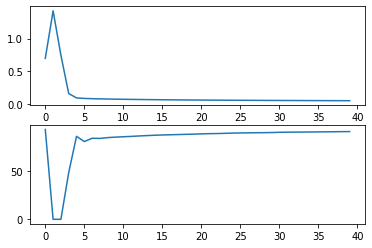

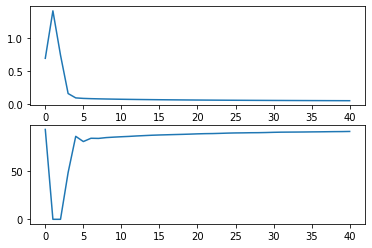

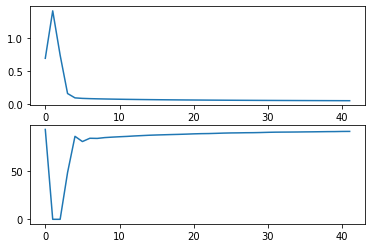

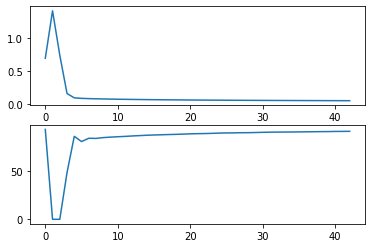

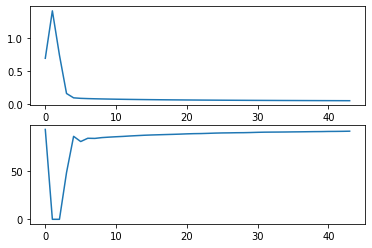

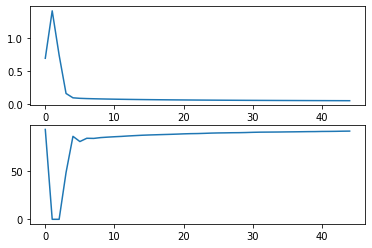

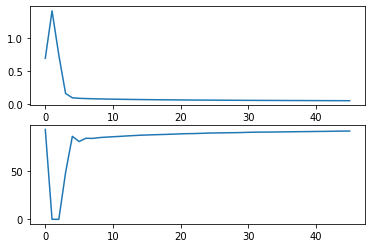

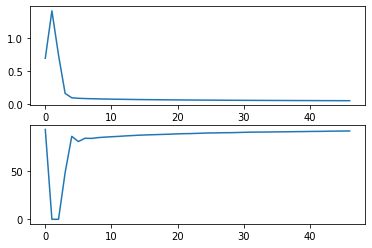

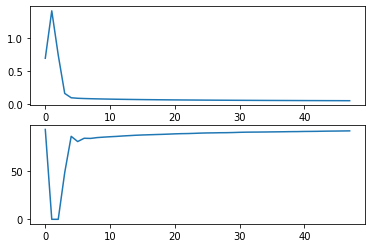

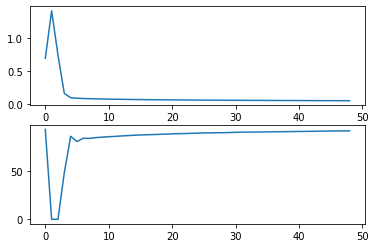

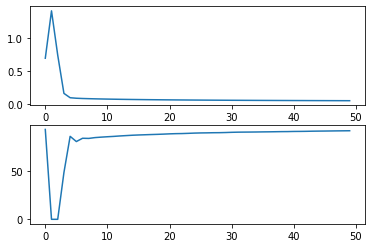

In [133]:
W,b = run_w()
test(W,b)
testImage(W,b,0)

